In [2]:
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("reviews.csv")
df.head()

,ReviewText
0,This product is amazing and very useful!
1,I didn’t like the quality of the material.
2,Good value for money.
3,"Terrible experience, won’t buy again."
4,Absolutely loved it!


In [4]:
df["ReviewText"] = df["ReviewText"].fillna("")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ReviewText  10 non-null     object
dtypes: object(1)
memory usage: 212.0+ bytes


In [6]:
df["TextLength"] = df["ReviewText"].apply(len)
df["WordCount"] = df["ReviewText"].apply(lambda t: len(t.split()))
df.head()

,ReviewText,TextLength,WordCount
0,This product is amazing and very useful!,40,7
1,I didn’t like the quality of the material.,42,8
2,Good value for money.,21,4
3,"Terrible experience, won’t buy again.",37,5
4,Absolutely loved it!,20,3


In [8]:
all_text = " ".join(df["ReviewText"].tolist()).lower()

In [10]:
tokens = all_text.replace(".", "").replace(",", "").split()

In [12]:
freq = Counter(tokens)
freq.most_common(10)

[('the', 5),
 ('product', 2),
 ('and', 2),
 ('quality', 2),
 ('experience', 2),
 ('this', 1),
 ('is', 1),
 ('amazing', 1),
 ('very', 1),
 ('useful!', 1)]

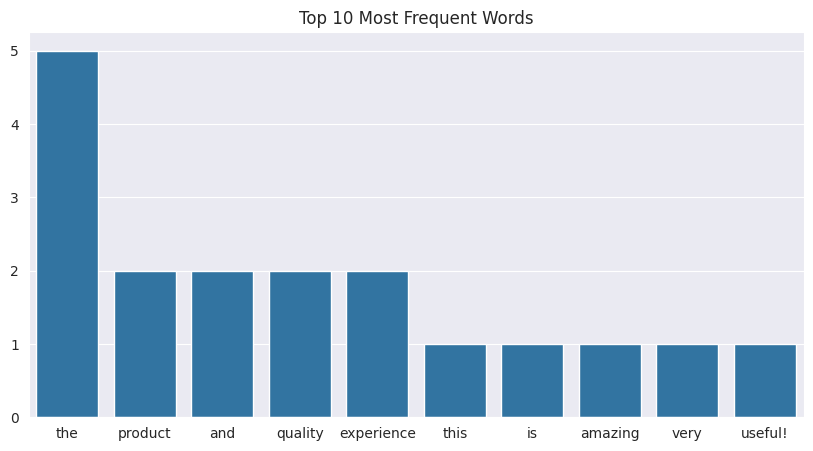

In [13]:
top_words = freq.most_common(10)
words = [w for w,_ in top_words]
counts = [c for _,c in top_words]

plt.figure(figsize=(10,5))
sns.barplot(x=words, y=counts)
plt.title("Top 10 Most Frequent Words")
plt.show()